# Problemas de regresión con tensor flow

En muchas ocaciones el interes es estudiar que patrones impactan a una variable númerica, el objetivo de esta sección es dar los fundamentos que permiten utilizar Tensor Flow como una herramienta para la predicción en problemas donde la variable de interes es númerica. Como ejemplo, algunos problemas pueden ser:

* Cuantas visitas espero tener si aumentos en $X$ la inversión en pauta.
* Cuantas espero que pese una personas si tiene una altura $Y$.

# Hiperparametros típicos de redes neuronales para regresión

| Hiperparametro           | Traducción                                 | Valor tipíco                                                                                             |
|--------------------------|--------------------------------------------|----------------------------------------------------------------------------------------------------------|
| Input layer shape        | Dimensión de la capa de entrada            | Es el número de caracteristicas (Ejm 2. Edad, Peso)                                                      |
| Hidden layers            | Número de capas ocultas                    | Como mínimo debe ser 1, como máximo dependiendo de la especificidad del problema                         |
| Neurons per hidden layer | Número de neuronas por cada                | Generalmente se encuentra entre 10 y 100 dependiendo de la especificidad del problema                    |
| Output layer shape       | Dimesión de la capa de salida              | Es la dimensión de la salida esperada. Para una predicción numérica es 1                                 |
| Hidden activation        | Función de activación oculta               | Usualmente **ReLU**                                                                                      |
| Output activation        | Función de activación de la capa de salida | ReLU, logistica/tangente hiperbolica, depende del problema.                                              |
| Loss function            | Función de perdida                         | MSE(Error cuadratico medio), MAE(Error absoluto medio), Huber(Combinación MSE y MAE si existen atípicos) |
| Optimizer                | Optimizador                                | SGD(Descenso de gradiente estocastico), Adam                                                             |

# Inicio con Tensor Flow

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.0


## Pasos a la hora de modelar con Tensor Flow

Cuanto trabajamos con Tesor Flow, usamos principalmente 3 pasos a la hora de construir un modelo.

1. **Instanciar el modelo ->** Se define la estructura de la red neuronal, número de capas, función de activación, número neuronas por capa.
2. **Compliar el modelo ->** Se definen los hiperparametros relacionados con la optimización del modelo. Función de perdida, optimizador
3. **Ajustar el modelo con los datos disponibles ->** Se buscan patrones en los datos por medio del modelo.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])


y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])


In [ ]:
# Se define la semilla aleatoria (Garantizar la reproducibilidad del experimento)
tf.random.set_seed(42)

# Se instancia el modelo (Se usa la API sequential de Keras)
modelo = tf.keras.Sequential()
modelo.add(tf.keras.layers.Dense(1)) # Se define una capa densa son solo una neurona)

# Se compila el modelo
modelo.compile(loss=tf.keras.losses.mae, # Error cuadratico medio como función de perdida
               optimizer=tf.keras.optimizers.SGD(), # Gradiente decedente estocastico como optimizador
               metrics=['mae'])

# Se ajusta el modelo
# epochs es el numero de veces que se usan los datos completos para ajustar el valor de los parametros
modelo.fit(tf.expand_dims(X, axis=-1), y, epochs=5) # tf.expand_dims(X, axis=-1) estructura cada elemento como un array [[-7.],[-4.],[-1.],[ 2.],[ 5.],[ 8.],[11.],[14.]]

Epoch 1/5
1/1 [==============================] - 1s 515ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 8ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 9ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 6ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 6ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
# Predecir usando el modelo
modelo.predict([20])

array([[14.9512005]], dtype=float32)

# Mejorando la predicción del modelo
Podemos mejorar la predicción de el modelo modificando los parametros de alguno de los pasos involucrados en la construcción del modelo:

1. **Instanciar el modelo ->** Se pueden agregar mas capas, neuronas en cada capa o cambiar la función de activación en cada capa.
2. **Compliar el modelo ->** Se puede cambiar el optimizador o cambiando la tasa de aprendizaje.
3. **Ajustar el modelo con los datos disponibles ->** Se puede aumentar el número de epoch o aumentando la cantidad de datos.

In [ ]:
from tensorflow.python.eager.monitoring import Metric
# Definir la semilla aleatoria
tf.random.set_seed(123)

# Crear el modelo
modelo = tf.keras.Sequential()
modelo.add(tf.keras.layers.Dense(1))

# Compilar el modelo
modelo.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['mae'])

# Ajustar el modelo (SE aumenta el número de epocas)
modelo.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 7ms/step - loss: 105.9560 - mae: 105.9560
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 57.3313 - mae: 57.3313
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 17.1302 - mae: 17.1302
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 9.9488 - mae: 9.9488
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 10.0549 - mae: 10.0549
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 9.9738 - mae: 9.9738
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 10.0741 - mae: 10.0741
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 9.8691 - mae: 9.8691
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 10.0910 - mae: 10.0910
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 11.9945 - mae: 11.9945
Epoch 11/100
2/2 [==============================] - 0s 5ms/step

In [ ]:
# Predecir usando el modelo
modelo.predict([20])

array([[34.84912]], dtype=float32)

# Evalución de modelos

Se debe particionar los datos en conjuntos de entrenamiento y test. En ocaciones se involucra un tercer conjunto conocido como validation. Cada uno de los tres conjuntos tiene un proposito especial.

1. **Conjunto de entrenamiento ->** Son los datos con lo cuales el modelo aprende, por lo general este conjunto contiene el 80% de las observaciones.
2. **Conjunto de validación ->** El modelo se mejora(tunning) en este conjunto. Generalmente represneta el 10% de los datos.
3. **Conjunto de test ->** Este conjunto permite evaluar el aprendizaje del modelo. Generalmente contiene el 10% de las observaciones.





⚡La visualización es una herramienta fundamental en nuestro proceso de modelamiento. Debes procurar visualizar cada una de las fases involucradas en la construción del modelo.

* Entender los datos de manera visual.
* Visualizar las componentes del modelo.
* Visualizar el entrenamiento del modelo.
* Visualizar los resultados de la predicción del modelo

In [ ]:
# Conjunto de datos
X = np.arange(-100, 100, 4)
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [ ]:
# Variable de respuesta
y = np.arange(-90, 110, 4)
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

## Visualizar el modelo

In [ ]:
# Semilla aleatoria
tf.random.set_seed(123)

# 1. Creación del modelo
# Como el objetivo es validad la estructura de nuestro modelo antes de realizar el 
# ajuste de este debemos definir la dimensión de la entrada de nuestro modelo
modelo = tf.keras.Sequential()
modelo.add(tf.keras.layers.Dense(1, input_shape=[1], name='Capa_entrada')) # El input_shape es [1] porque en nuestro caso ingresa un número para predecir otro número

# 2. Compilar el modelo
modelo.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['mae'])

In [ ]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Capa_entrada (Dense)        (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


* **Total params:** Número total de parametros en el modelo.
* **Trainable params:** Número de parametros que pueden actualizar cuando entrena.
* **Non-trainable params:** No son actualizados durante el entrenamiento. Estos parametro vienen de otros modelos por medio de Transfer Learning.


In [ ]:
modelo.fit(tf.expand_dims(X, axis=-1), y, epochs=100, verbose=0)

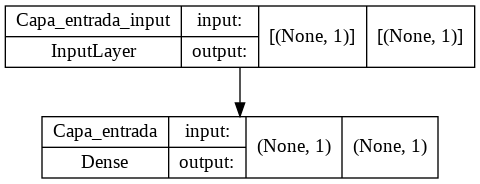

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model=modelo, show_shapes=True)

## Evaluación del modelo las predicciones del modelo


In [ ]:
predicciones = modelo.predict(X)

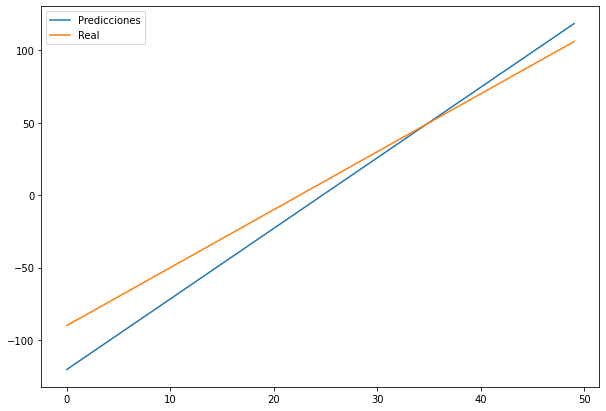

In [ ]:
  import matplotlib.pyplot as plt
  plt.figure(figsize=(10, 7))
  # Representar el conjunto de covariables 
  plt.plot(predicciones, label="Predicciones")
  plt.plot(y, label="Real")
  plt.legend();
  plt.show();

In [ ]:
modelo.evaluate(predicciones, y)

2/2 [==============================] - 0s 9ms/step - loss: 24.8092 - mae: 24.8092


[24.809194564819336, 24.809194564819336]

In [ ]:
# La metrica aplicada retorna multiples valores ya que esta calculado elemento a elemento el mae. Para corregir ese problemas
# se debe redimensiones el vector de valores predichos
mae = tf.metrics.mean_absolute_error(predicciones, y)
mae


<tf.Tensor: shape=(50,), dtype=int64, numpy=
array([128, 123, 118, 113, 108, 103,  99,  94,  89,  85,  81,  77,  73,
        71,  68,  65,  62,  60,  58,  56,  54,  53,  52,  51,  50,  50,
        50,  50,  50,  50,  51,  52,  53,  55,  56,  58,  61,  63,  65,
        68,  71,  75,  78,  82,  86,  90,  95, 100, 105, 110])>

In [ ]:
# Para redimensionar los valores reales se usa la funcion tf.squeeze() sobre los valores reales
mae = tf.metrics.mean_absolute_error(y, tf.squeeze(predicciones))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=12.74983>

In [ ]:
mse = tf.metrics.mean_squared_error(y, tf.squeeze(predicciones))
mse


<tf.Tensor: shape=(), dtype=float32, numpy=239.0074>

## Mejorando el modelo

1. Tener mas datos.
2. Hacer el modelo mas complejo.
3. Permitir mas busqueda de parametros.

In [ ]:
# Definir la semilla aleatoria
tf.random.set_seed(123)

#1.  Crear el modelo
modelo_1 = tf.keras.Sequential()
modelo_1.add(tf.keras.layers.Dense(1))

# 2. Compliar el modelo
modelo_1.compile(loss=tf.keras.losses.mae,
                 optimizer=tf.keras.optimizers.SGD(),
                 metrics=['accuracy'])
# 3. Ajustar el modelo
modelo_1.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 7ms/step - loss: 105.9560 - accuracy: 0.0000e+00
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 57.3313 - accuracy: 0.0000e+00
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 17.1302 - accuracy: 0.0000e+00
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 9.9488 - accuracy: 0.0000e+00
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 10.0549 - accuracy: 0.0000e+00
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 9.9738 - accuracy: 0.0000e+00
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 10.0741 - accuracy: 0.0000e+00
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 9.8691 - accuracy: 0.0000e+00
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 10.0910 - accuracy: 0.0000e+00
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 11.9945 - ac

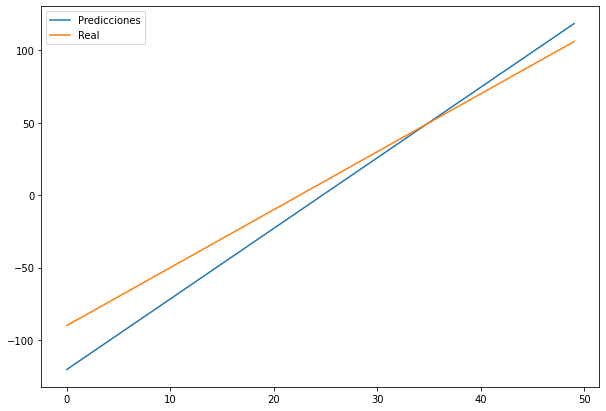

In [ ]:
# Visualizar las predicciones para el modelo_1
prediccion_1 = modelo_1.predict(X)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
# Representar el conjunto de covariables 
plt.plot(prediccion_1, label="Predicciones")
plt.plot(y, label="Real")
plt.legend();
plt.show();

In [ ]:
mae_1 = tf.metrics.mean_absolute_error(tf.squeeze(prediccion_1), y)
mae_1

<tf.Tensor: shape=(), dtype=int64, numpy=12>

## Mejorando el modelo con 2 capas densas

In [ ]:
# 1. Crear el modelo
modelo_2 = tf.keras.Sequential()
modelo_2.add(tf.keras.layers.Dense(10))
modelo_2.add(tf.keras.layers.Dense(1))

# 2. Compilar el modelo
modelo_2.compile(loss=tf.keras.losses.mae,
                 optimizer=tf.keras.optimizers.SGD(),
                 metrics=['accuracy'])

# 3. Ajustar el modelo
modelo_2.fit(tf.expand_dims(X, axis=-1), y, epochs=100)


Epoch 1/100
2/2 [==============================] - 1s 9ms/step - loss: 37.1021 - accuracy: 0.0000e+00
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 31.9657 - accuracy: 0.0000e+00
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 23.1444 - accuracy: 0.0000e+00
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 22.5003 - accuracy: 0.0000e+00
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 23.9716 - accuracy: 0.0000e+00
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 12.4230 - accuracy: 0.0000e+00
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 30.1109 - accuracy: 0.0000e+00
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 9.7860 - accuracy: 0.0000e+00
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 13.5980 - accuracy: 0.0000e+00
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 33.7461 - a

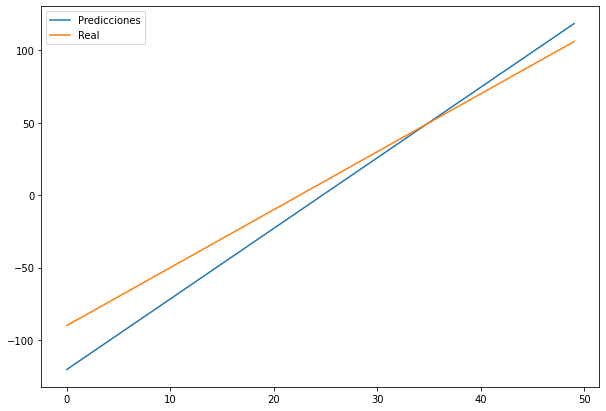

In [ ]:
# Visualizar las predicciones para el modelo_1
prediccion_2 = modelo_2.predict(X)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
# Representar el conjunto de covariables 
plt.plot(prediccion_1, label="Predicciones")
plt.plot(y, label="Real")
plt.legend();
plt.show();

In [ ]:
mae_2 = tf.metrics.mean_absolute_error(tf.squeeze(prediccion_2), y)
mae_2

<tf.Tensor: shape=(), dtype=int64, numpy=14>

# Ejemplo con datos reales

## Alistando los datos

In [1]:
# Importar las librerias requeridas
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Leer la base de datos
df_seguros = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
df_seguros.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Crear convetir los niveles de las variable categoricas en variables indicadoras
df_seguros_indicadoras = pd.get_dummies(df_seguros)
df_seguros_indicadoras.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [4]:
# Crear los valores X y Y (Caracteristicas y etiquetas)
X = df_seguros_indicadoras.drop('charges', axis=1) # Se elimina la variable de respuesta
y = df_seguros_indicadoras['charges']

In [5]:
from sklearn.model_selection import train_test_split
# Particionar para tener los elementos para entrenamiento y prueba
X_entrenamiento, X_test, y_entrenamiento, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Construyendo el modelo

In [ ]:
# Definir la semilaa aleatoria para la red neuronal
tf.random.set_seed(123)

# 1. Crear el modelo
modelo_seguros = tf.keras.Sequential()
modelo_seguros.add(tf.keras.layers.Dense(10))
modelo_seguros.add(tf.keras.layers.Dense(1))

# 2. Compilar el modelo
modelo_seguros.compile(loss=tf.keras.losses.mae,
                       optimizer=tf.keras.optimizers.SGD(),
                       metrics=['mae'])

# 3. Ajustar el modelo
modelo_seguros.fit(X_entrenamiento, y_entrenamiento, epochs=100)


Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 8536.5020 - mae: 8536.5020
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 7713.2388 - mae: 7713.2388
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 7426.6899 - mae: 7426.6899
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 7643.6533 - mae: 7643.6533
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 7618.1987 - mae: 7618.1987
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7587.3667 - mae: 7587.3667
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7631.8052 - mae: 7631.8052
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7587.9556 - mae: 7587.9556
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7723.2070 - mae: 7723.2070
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 7634.6450 - mae: 7634.6450

In [ ]:
# Evaluar los resultados del modelo con los datos de test
modelo_seguros.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 6165.8486 - mae: 6165.8486


[6165.8486328125, 6165.8486328125]

## Mejorando el modelo

In [ ]:
# Definir la semilla aleatoria
tf.random.set_seed(123)

# 1. Crear el modelo (Instanciarlo)
modelo_seguros_v2 = tf.keras.Sequential()
modelo_seguros_v2.add(tf.keras.layers.Dense(100))
modelo_seguros_v2.add(tf.keras.layers.Dense(10))
modelo_seguros_v2.add(tf.keras.layers.Dense(1))

# 2. Compilar el modelo, cambiamos el optimizador a adam
modelo_seguros_v2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# 3. Ajustar el modelo
modelo_seguros_v2.fit(X_entrenamiento, y_entrenamiento, epochs=100, verbose=1)


Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13312.2314 - mae: 13312.2314
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13202.5986 - mae: 13202.5986
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 12957.5410 - mae: 12957.5410
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 12438.5371 - mae: 12438.5371
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 11496.9277 - mae: 11496.9277
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 10120.1348 - mae: 10120.1348
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 8682.5615 - mae: 8682.5615
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 7700.6035 - mae: 7700.6035
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7467.0742 - mae: 7467.0742
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 7434.7158 - ma

In [ ]:
# Evaluar los resultados del modelo con los datos de test
modelo_seguros_v2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: nan - mae: nan


[nan, nan]

In [ ]:
# Definir la semilla aleatori
tf.random.set_seed(123)

# 1. Crear el modelo
modelo_seguros_v3 = tf.keras.Sequential()
modelo_seguros_v3.add(tf.keras.layers.Dense(100))
modelo_seguros_v3.add(tf.keras.layers.Dense(10))
modelo_seguros_v3.add(tf.keras.layers.Dense(1))

# 2. Compilar el modelo
modelo_seguros_v3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])
# 3. Ajustar el modelo
historia = modelo_seguros_v3.fit(X_test, y_test, epochs=200)

Epoch 1/200
9/9 [==============================] - 1s 4ms/step - loss: 12961.8262 - mae: 12961.8262
Epoch 2/200
9/9 [==============================] - 0s 5ms/step - loss: 12943.6914 - mae: 12943.6914
Epoch 3/200
9/9 [==============================] - 0s 4ms/step - loss: 12923.4541 - mae: 12923.4541
Epoch 4/200
9/9 [==============================] - 0s 3ms/step - loss: 12900.2002 - mae: 12900.2002
Epoch 5/200
9/9 [==============================] - 0s 3ms/step - loss: 12872.1729 - mae: 12872.1729
Epoch 6/200
9/9 [==============================] - 0s 3ms/step - loss: 12837.5127 - mae: 12837.5127
Epoch 7/200
9/9 [==============================] - 0s 3ms/step - loss: 12794.2139 - mae: 12794.2139
Epoch 8/200
9/9 [==============================] - 0s 3ms/step - loss: 12740.2715 - mae: 12740.2715
Epoch 9/200
9/9 [==============================] - 0s 4ms/step - loss: 12672.4814 - mae: 12672.4814
Epoch 10/200
9/9 [==============================] - 0s 4ms/step - loss: 12588.8936 - mae: 12588.8936

Text(0.5, 0, 'Epocas')

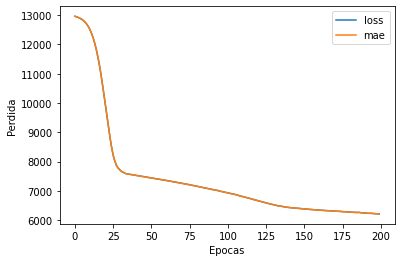

In [ ]:


pd.DataFrame(historia.history).plot()
plt.ylabel('Perdida')
plt.xlabel('Epocas')

## Preprocesar los datos
Normalización y estandarización.

Las redes neuronales trabajan mejor con variabel numericas normalizadas ya que ayudan a converger mas rapido ya que modifica la función objetivo evitando cambios de curvatura muy pronunciados.

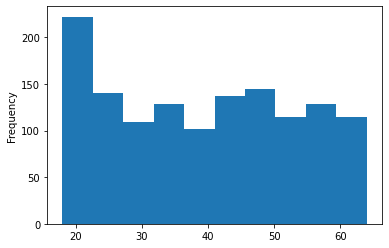

In [ ]:
X['age'].plot(kind='hist')

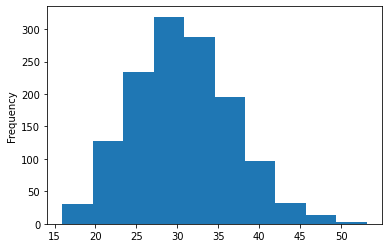

In [ ]:
X['bmi'].plot(kind='hist')

In [6]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [10]:
# Crear columna transformada
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']), # Aplica la normalización min -max a todas las columnas  en el array
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region'])
)

# Crear los valores X y Y
X = df_seguros.drop('charges', axis=1)
y = df_seguros['charges']

# Construi conjuntos de entrenamiento y prueba
X_entrenamiento, X_testeo, y_entrenamiento, y_testeo = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar las transformaciones a la base de datos de entrenamiento
ct.fit(X_entrenamiento)

# transformar el conjutno de entrenamiento y test
X_entrenamiento_normalizado = ct.transform(X_entrenamiento)
X_testeo_normalizado = ct.transform(X_testeo)

In [11]:
X_entrenamiento_normalizado

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

sample_data
